<a href="https://colab.research.google.com/github/ptran1203/DAGM_2007/blob/master/defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
from google.colab import drive, output
data_loaded = False
drive.mount('/content/drive')
!rm -rf '/content/DAGM_2007'
!git clone https://github.com/ptran1203/DAGM_2007

In [ ]:
cd DAGM_2007

/content/DAGM_2007


In [ ]:
from compact_cnn import *
from dataloader import *
from utils import *
from autoencoder import AutoEncoder

BASE_DIR = "/content/drive/My Drive/DAGN2007"
class CModel(CompactModel):
    pass
class DataGen(DataGenerator):
    pass
class AEModel(AutoEncoder):
    def autoencoder(self):
        image = Input(shape=(self.rst, self.rst, 1))

        # Encode
        x1 = self._conv_block(image, 1, 11, strides=1)
        x2 = self._conv_block(x1, 48, 9, strides=2)
        x3 = self._conv_block(x2, 48, 7, strides=2)
        x4 = self._conv_block(x3, 48, 5, strides=2)
        x5 = self._conv_block(x4, 48, 3, strides=2)

        # Decode
        up1 = self._deconv_block(x5, 48, 5, strides=2)
        up2 = self._deconv_block(up1, 48, 7, strides=2, skip_con=x3)
        up3 = self._deconv_block(up2, 48, 9, strides=2, skip_con=x2)
        up4 = self._deconv_block(up3, 48, 11, strides=2, skip_con=x1)

        out = self._conv_block(up4, 1, 1, 1, activation='tanh')

        model = Model(inputs=image, outputs=out)
        model.compile(optimizer=Adam(lr=self.lr), loss='mean_squared_error')

        return model

compact_model = CModel(rst=512, lr=0.001, base_dir=BASE_DIR)
ae_model = AEModel(rst=512, lr=0.001, base_dir=BASE_DIR)
if not data_loaded:
    data_gen = DataGen(BASE_DIR, batch_size=8, mode = 1, prune=[450],cls=2)
    test_gen = DataGen(BASE_DIR, batch_size=8, mode = 2, cls=2)
    data_loaded = True

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/imgs_train.pkl
load data successfully
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/marks_train.pkl
load data successfully
0
Remove 450 items in class 0
Counter({1: 66, 0: 60})
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/imgs_test.pkl
load data successfully
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/marks_test.pkl
load data successfully
Counter({0: 492, 1: 84})


In [ ]:
# class_weight = {0: 1, 1: 1}
# ae_model.train(data_gen, data_gen, epochs=50,
#                 class_weight=class_weight,
#                 augment_factor=1)
# ae_model.save_weight()


In [ ]:
ae_model.load_weight()

(array([  8,  11,  12,  19,  21,  22,  30,  41,  54,  64,  74,  84,  95,
        98, 112, 114, 128, 129, 130, 141, 143, 149, 151, 154, 180, 183,
       184, 186, 188, 192, 202, 209, 224, 237, 239, 240, 243, 249, 255,
       259, 288, 291, 295, 302, 303, 306, 308, 314, 315, 321, 326, 333,
       335, 340, 346, 354, 355, 360, 365, 368, 382, 386, 387, 391, 403,
       410, 428, 444, 453, 461, 474, 476, 482, 485, 502, 506, 527, 533,
       534, 538, 555, 564, 572, 573]),)


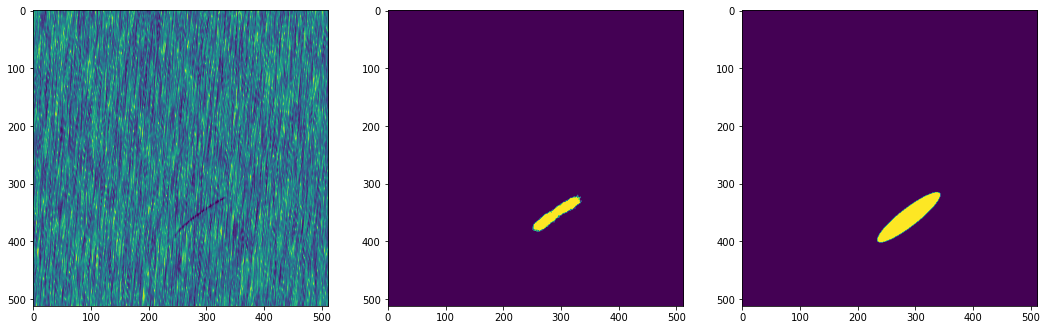

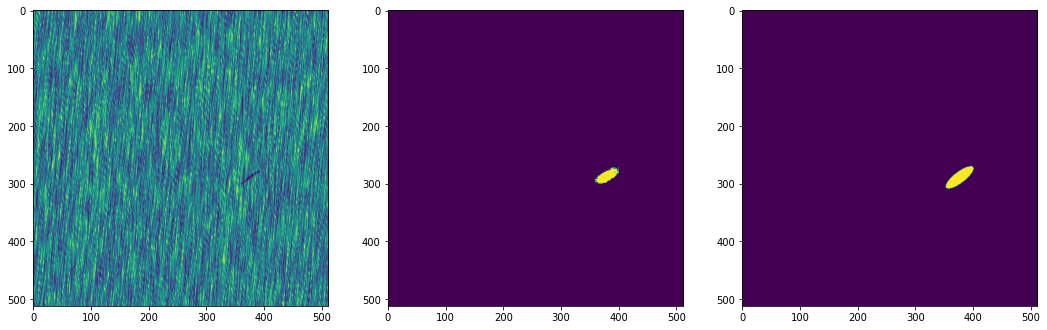

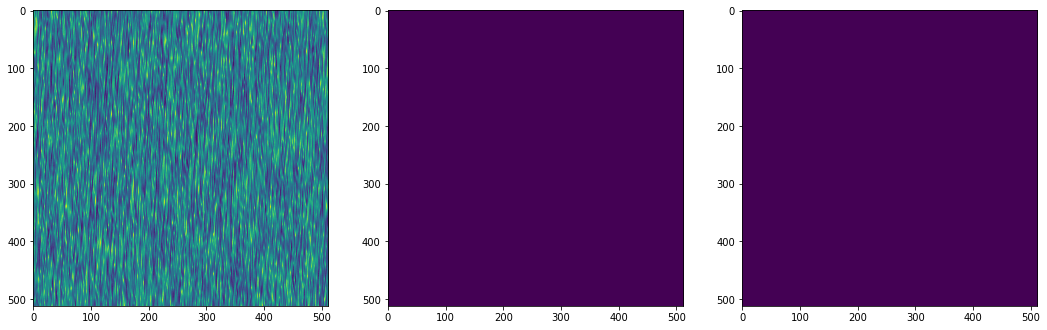

In [ ]:

gen_obj = test_gen
# gen_obj = data_gen

start = 0
idx = np.where(gen_obj.labels == 1)
print(idx)
for i in [365, 502, 505]:
    # compact_model.show_output(gen_obj.x, gen_obj.y, start + i*3)
    ae_model.show_output(gen_obj.x, gen_obj.y, i)


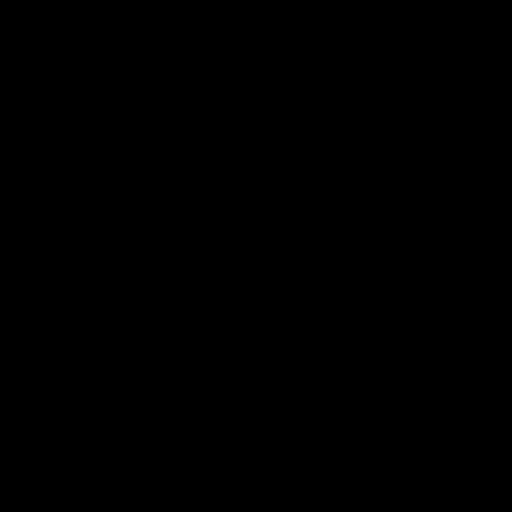

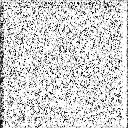

In [ ]:

idx = 15
x = data_gen.x[idx]
y = data_gen.y[idx]
# x = de_norm(x)
seg = compact_model.seg_model.predict(np.expand_dims(x, 0))
cv2_imshow(de_norm(y))
cv2_imshow(de_norm(seg[0]))